In [1]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import cv2;
import matplotlib.pyplot as plt
import numpy as np;
import pandas as pd
from random import shuffle;
import cv2;
from random import shuffle;
from tqdm import tqdm;
import tensorflow;
from tensorflow.keras import layers;
from tensorflow.keras import Model;
from tensorflow.keras.optimizers import SGD;
from tensorflow.keras.callbacks import TensorBoard;
IMAGE_SIZE = 300;

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
train_Data_X_File = drive.CreateFile({'id': '1IJRvy-hV3sgEzjJVMnAtieeaASnjClZ1'});
train_Data_Y_File = drive.CreateFile({'id': '1_flYvBAJCp-vP0lYWkAEH3NgkS6Oqa9W'});

In [2]:
#load the trained dataset

train_Data_X_File.GetContentFile('train_Data_X.npy');
train_Data_X = np.load('train_Data_X.npy', allow_pickle=True)

train_Data_Y_File.GetContentFile('train_Data_Y.npy');
train_Data_Y = np.load('train_Data_Y.npy', allow_pickle=True)

In [3]:
train_Data_X.shape

(3662, 1, 300, 300, 3)

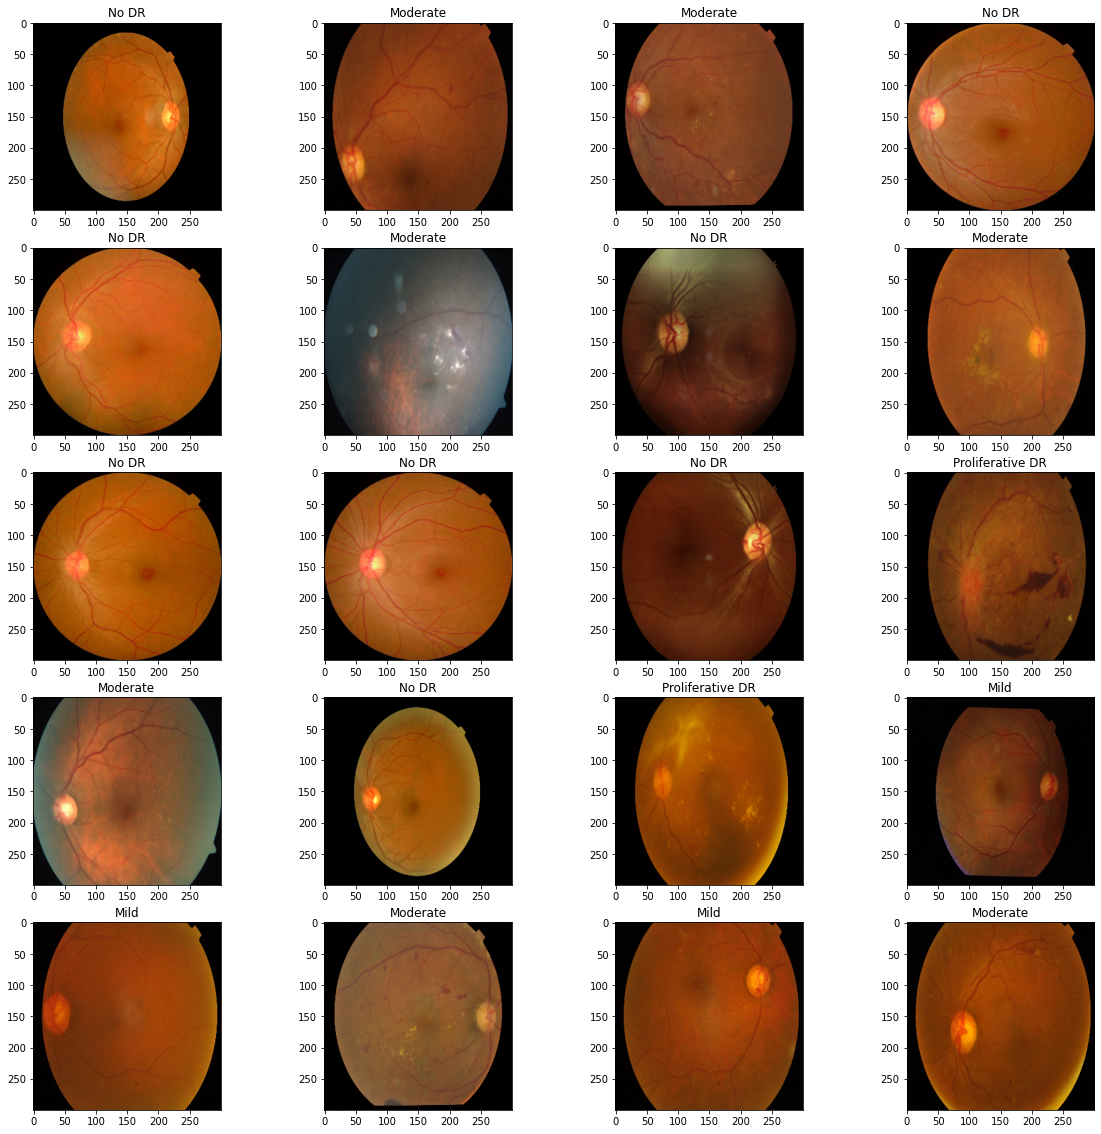

In [4]:
count = 0;
Num_of_Images = 20;
plt.figure(figsize=(20,20))
label = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR'];
for i in np.random.randint(1000, size = Num_of_Images):
  count = count+1;
  plt.subplot(Num_of_Images/4,4, count);
  plt.imshow(np.reshape(train_Data_X[i],(IMAGE_SIZE,IMAGE_SIZE,3)));
  plt.title(label[int(train_Data_Y[i])]);

In [5]:
num_of_Rows = train_Data_X.shape[0];
num_of_columns = train_Data_X.shape[1];
training_X = train_Data_X[:int(np.round(num_of_Rows*0.8))]   
testing_X = train_Data_X[int(np.round(num_of_Rows*0.8)):]    
training_Y = train_Data_Y[:int(np.round(num_of_Rows*0.8))]   
testing_Y = train_Data_Y[int(np.round(num_of_Rows*0.8)):]    


In [6]:
img_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(5, activation='softmax')(x)

model = Model(img_input, output)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496 

In [9]:
from keras.optimizers import Adam

In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.00005),metrics=['acc']);


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
X_train = np.array([i[0] for i in tqdm(training_X)]);
Y_train = np.array([i[0] for i in training_Y]);

X_test = np.array([i[0] for i in tqdm(testing_X)]);
Y_test = np.array([i[0] for i in testing_Y]);

100%|██████████| 732/732 [00:00<00:00, 487647.80it/s]


In [12]:
X_train.shape

(2930, 300, 300, 3)

In [13]:
Model_fit = model.fit(X_train,Y_train, batch_size =64, epochs = 10,verbose=1, validation_data=(X_test, Y_test))


Epoch 1/10
46/46 [==============================] - 15s 140ms/step - loss: 3.5469 - acc: 0.5956 - val_loss: 0.9127 - val_acc: 0.7254
Epoch 2/10
46/46 [==============================] - 5s 105ms/step - loss: 0.7676 - acc: 0.7259 - val_loss: 0.9124 - val_acc: 0.7240
Epoch 3/10
46/46 [==============================] - 5s 105ms/step - loss: 0.6817 - acc: 0.7444 - val_loss: 0.8820 - val_acc: 0.7227
Epoch 4/10
46/46 [==============================] - 5s 106ms/step - loss: 0.6484 - acc: 0.7621 - val_loss: 0.8104 - val_acc: 0.7240
Epoch 5/10
46/46 [==============================] - 5s 106ms/step - loss: 0.5818 - acc: 0.7850 - val_loss: 0.8766 - val_acc: 0.7404
Epoch 6/10
46/46 [==============================] - 5s 106ms/step - loss: 0.5660 - acc: 0.7956 - val_loss: 0.7794 - val_acc: 0.7363
Epoch 7/10
46/46 [==============================] - 5s 107ms/step - loss: 0.4847 - acc: 0.8314 - val_loss: 0.7929 - val_acc: 0.7404
Epoch 8/10
46/46 [==============================] - 5s 107ms/step - loss: 0

In [14]:
Marks = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy percentage:', 100*Marks[1],"%")
print('Test loss perentage:', 100*Marks[0],"%")

Test accuracy percentage: 73.49726557731628 %
Test loss perentage: 83.29731822013855 %


In [15]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 22ms/step


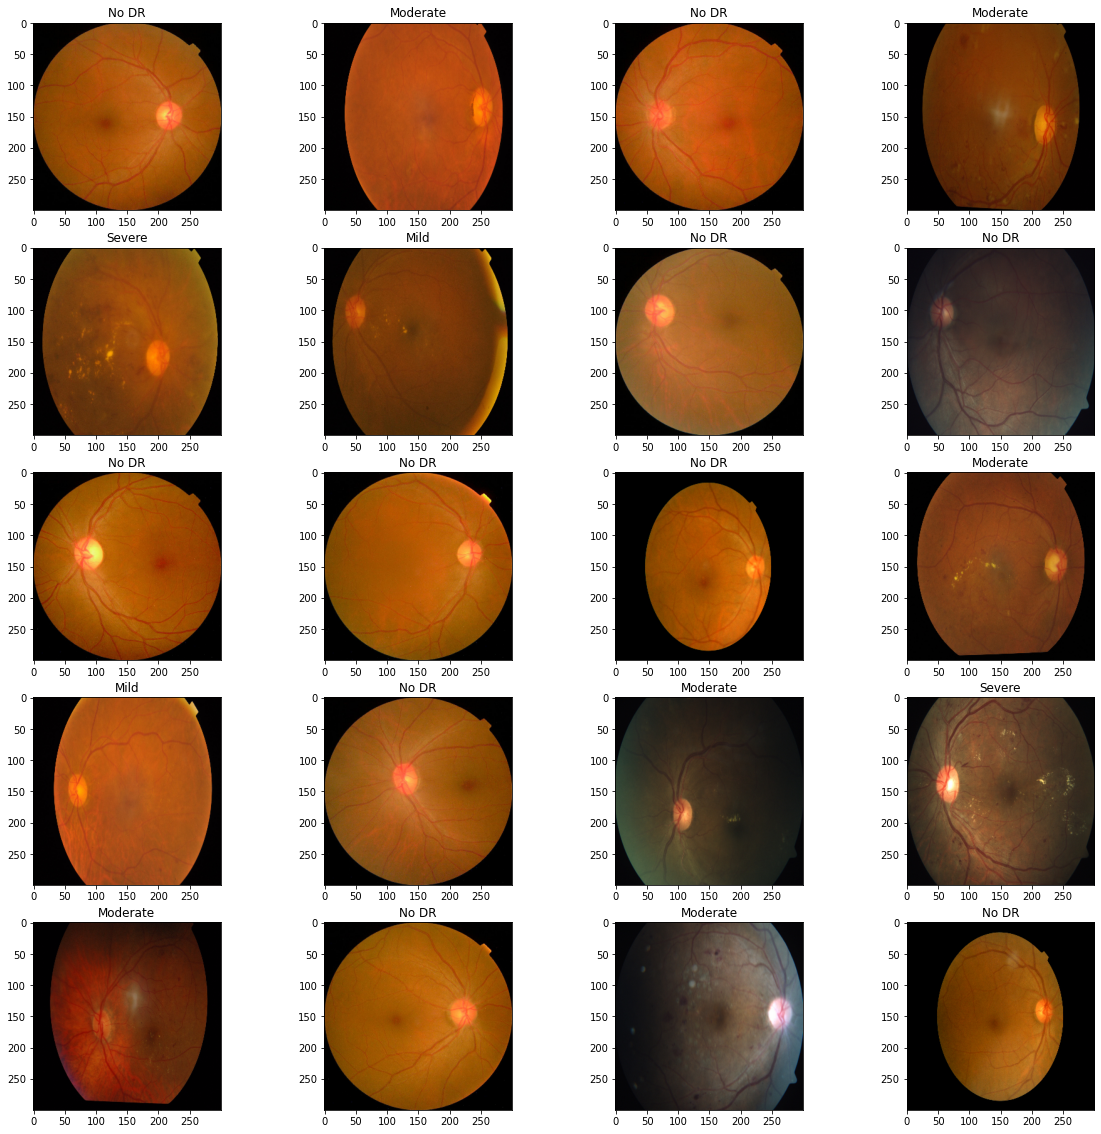

In [16]:
count = 0;
Num_of_Images = 20;
plt.figure(figsize=(20,20))
label = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR'];
for i in np.random.randint(500, size = Num_of_Images):
  count = count+1;
  plt.subplot(Num_of_Images/4,4, count);
  plt.imshow(np.reshape(X_test[i],(IMAGE_SIZE,IMAGE_SIZE,3)));
  P = model.predict(X_test[i].reshape(1,IMAGE_SIZE,IMAGE_SIZE,3)) # Prediction of testing images
  P = np.array(P);
  plt.title(label[int(Y_test[i])]);

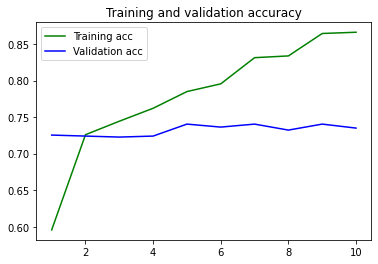

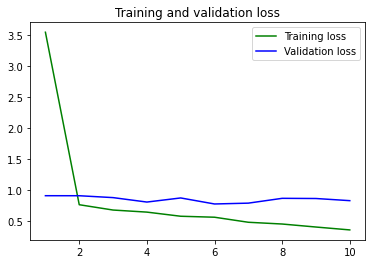

In [17]:
acc = Model_fit.history['acc']
val_acc = Model_fit.history['val_acc']
loss = Model_fit.history['loss']
val_loss = Model_fit.history['val_loss']
epochs = range(1, len(acc) + 1)

#Plotting Training and Validation accuracy
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

#Plotting Training and Validation loss
plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()
plt.show()


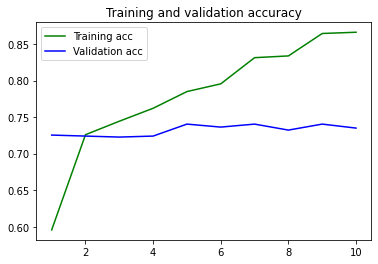

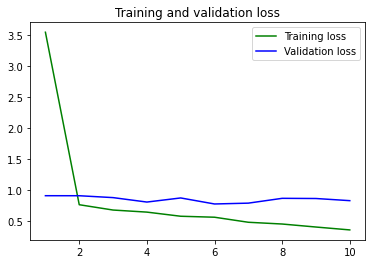


The image is not blind.


In [19]:
# Set threshold for deciding if image is blind or not
threshold = 0.5

acc = Model_fit.history['acc']
val_acc = Model_fit.history['val_acc']
loss = Model_fit.history['loss']
val_loss = Model_fit.history['val_loss']
epochs = range(1, len(acc) + 1)

#Plotting Training and Validation accuracy
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

#Plotting Training and Validation loss
plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()
plt.show()


if val_acc[-1] > threshold:
    print("\nThe image is not blind.")
else:
    print("\nThe image is blind.")
